In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [48]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [49]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [50]:
ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
Modelo= HMM(A,B,PI)


In [51]:

data=pd.read_csv('RealROBOT/lecturasconodometria-noisy-a.txt')
#data=data.iloc[:40,:]

cols=['x','y','theta','y_noise','x_noise','theta_noise']
n_reads=data.shape[1]-6
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)


data.columns=etiquetas

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=pd.DataFrame(np.clip(lecs.values,0,3))
data.y_noise=data.y_noise*-1

lecs.describe()


,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1.743439,1.744909,1.754330,1.757133,1.748436,1.757432,1.765754,1.765348,1.780917,1.792958,...,2.154606,2.104496,2.087000,2.073973,2.067409,2.052140,2.047485,2.034754,2.019341,2.020114
std,1.017095,1.016295,1.016774,1.020715,1.024684,1.021947,1.020083,1.017688,1.012653,1.000869,...,0.712857,0.791964,0.821966,0.824994,0.824693,0.848076,0.862156,0.854418,0.860263,0.855498
min,0.194000,0.340000,0.535000,0.526000,0.415000,0.415000,0.541000,0.541000,0.553000,0.555000,...,0.641000,0.626000,0.598000,0.590000,0.595000,0.547000,0.538000,0.541000,0.534000,0.519000
25%,0.606750,0.602750,0.603000,0.604750,0.605000,0.607750,0.619000,0.633500,0.650000,0.660000,...,1.574750,1.576750,1.587250,1.588000,1.581750,1.584500,1.577250,1.578750,1.577750,1.581500
50%,2.076000,2.090500,2.073500,2.088500,2.110500,2.100000,2.107500,2.104000,2.120000,2.117500,...,2.124500,2.114000,2.103500,2.106500,2.067500,2.086500,2.065000,2.052500,2.057500,2.052500
75%,2.752000,2.768250,2.866500,2.807000,2.845000,2.851250,2.863250,2.852500,2.843500,2.837750,...,2.946250,2.968500,2.989250,2.945000,2.939500,2.939250,2.964000,2.926500,2.902000,2.875000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [52]:

from sklearn.cluster import FeatureAgglomeration

from sklearn.decomposition import PCA, KernelPCA

F_agg= FeatureAgglomeration(n_clusters=45).fit(lecs)
pca =PCA(n_components=45).fit(lecs)



lecs_pca=pd.DataFrame(pca.transform(lecs))

lecs_fag=pd.DataFrame(F_agg.transform(lecs))
lecs_fag.shape

(264, 45)

In [53]:
rot_ang=3.1416/8
R= np.ones((2,2))
R[0,0]= np.cos(rot_ang)
R[0,1]= -np.sin(rot_ang)
R[1,0]= np.sin(rot_ang)
R[1,1]= np.cos(rot_ang)
rotated=[]
for xy in data[['x_noise','y_noise']].values:
    xy_rotated=np.matmul(R,xy)
    rotated.append(xy_rotated)
rotated=np.asarray(rotated)
data['x_rot']=rotated[:,0]
data['y_rot']=rotated[:,1]
tx=data.x.iloc[0]-data.x_rot.iloc[0]
ty=data.y.iloc[0]-data.y_rot.iloc[0]
tx,ty
data.x_rot=data.x_rot+tx
data.y_rot=data.y_rot+ty


In [54]:
delta_odom= np.linalg.norm(data[['x','y']].values-data[['x_rot','y_rot']].values,axis=1)
data['delta_odom'] =delta_odom

In [55]:
data.delta_odom.describe()

count    264.000000
mean       0.944422
std        0.801651
min        0.000000
25%        0.094187
50%        0.748308
75%        1.865282
max        1.960854
Name: delta_odom, dtype: float64

In [56]:
x_1,y_1,th_1= 0,0,0
delta_mov=[]
delta_th=[]
for x,y,th in zip (data.x,data.y,data.theta):
    
    
    delta_mov.append(np.array((x,y))-np.array((x_1,y_1)  ))
    if (th-th_1)> 6:
        delta_th.append(th-th_1-(2*3.1416))
    if (th-th_1)<- 6:
        delta_th.append(th-th_1+(2*3.1416))
    
    if ((th-th_1)>- 6 and (th-th_1)< 6  ):
        delta_th.append(th-th_1)
    x_1,y_1,th_1=x,y,th


In [57]:
x_1,y_1,th_1= 0,0,0
delta_mov_rot=[]
delta_th_rot=[]
for x,y,th in zip (data.x_rot,data.y_rot,data.theta_noise):
    
    
    delta_mov_rot.append(np.array((x,y))-np.array((x_1,y_1)  ))
    if (th-th_1)> 6:
        delta_th_rot.append(th-th_1-(2*3.1416))
    if (th-th_1)<- 6:
        delta_th_rot.append(th-th_1+(2*3.1416))
    
    if ((th-th_1)>- 6 and (th-th_1)< 6  ):
        delta_th_rot.append(th-th_1)
    x_1,y_1,th_1=x,y,th


In [58]:
delta_th[0],delta_th_rot[0]=0,0

$$ThetaNoise ,   N(\mu ,\sigma) $$

$$XY Noise ,   N(\mu ,\sigma) $$

In [60]:
xyth_od=data[['x_rot','y_rot','theta_noise']]


In [61]:
if True:
    
    K_corpus=128
    N=16
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs_fag)  ########CHOOSE LECS OR DIM REDUCED LECS
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
aus=[]
aus_odom=[]
auvks=[]
for i,lec,j in zip(xyth.values, lecs_fag.values,xyth_od.values):########CHOOSE LECS OR DIM REDUCED LECS
    _, au= quantized(i , ccxyth)
    _, au_od= quantized(i , ccxyth)
    aus.append(au)
    aus_odom.append(au_od)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
    auvks.append(auvk)

data['Y']=aus
data['Y_odom']=aus_odom
data['Vk']=auvks


In [119]:
from sklearn.cluster import AffinityPropagation

#data['Vk_aff'] = AffinityPropagation().fit_predict(lecs_fag)
data['Vk_aff']=data['Vk']

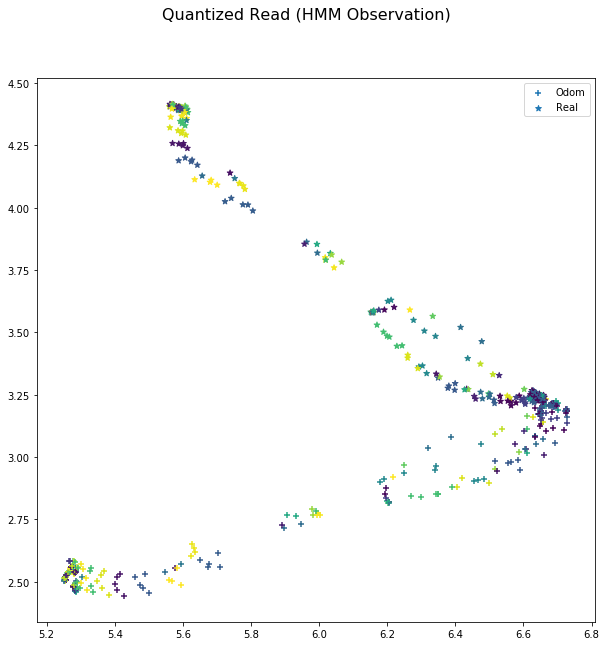

In [120]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Quantized Read (HMM Observation)', fontsize=16)

ax1 = fig.add_subplot(111)

ax1.scatter(x=data.x_rot,y=data.y_rot,marker='+' ,c=data.Vk, label='Odom' )
ax1.scatter(x=data.x,y=data.y ,marker='*', c=data.Vk,label='Real')
ax1.legend()

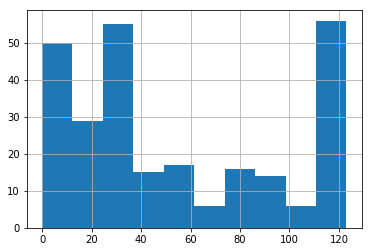

In [121]:
data.Vk_aff.hist()

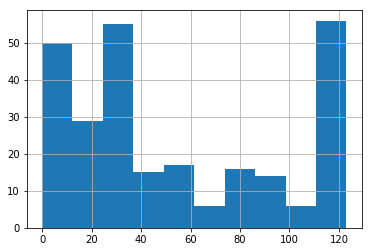

In [122]:
data.Vk.hist()

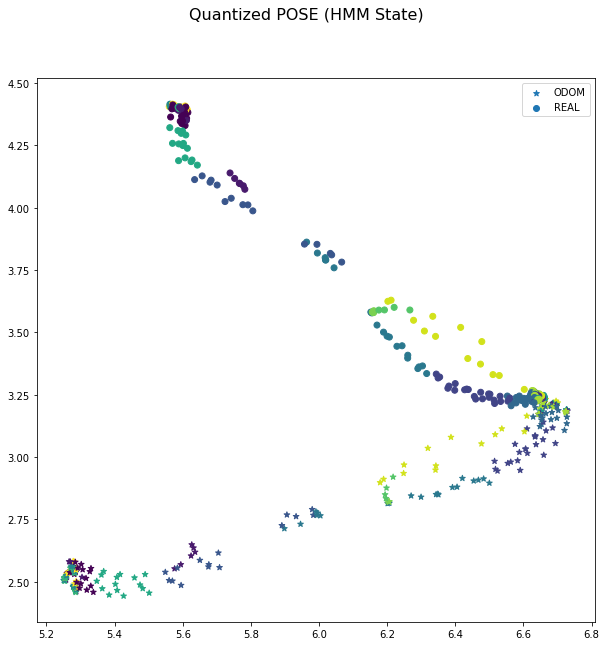

In [123]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
fig.suptitle('Quantized POSE (HMM State)', fontsize=16)

ax1.scatter(x=data.x_rot,y=data.y_rot,marker='*' ,c=data.Y_odom  ,label='ODOM')
ax1.scatter(x=data.x,y=data.y , c=data.Y,label='REAL')
ax1.legend()

In [124]:
save=False
est,obs,obs2= data.Y.values,data.Vk.values,data.Vk_aff.values

In [125]:
####BAUM WELCH APPROX###############???!?!?!


TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)


if save:

    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    print("MODEL NOT SAVED")
B.shape

MODEL NOT SAVED


(16, 124)

In [126]:
####BAUM WELCH APPROX###############???!?!?!


K_corpus2= obs2.max()+1
TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus2))
for Vk in range (K_corpus2):

    indices=np.asarray(np.where(obs2==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))


PI=np.ones(N)/N
Modelo2=HMM(TRANS,EMIS,PI)


if save:

    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo2.A)
    np.save('B.npy',Modelo2.B)
    np.save('PI.npy',Modelo2.PI)
    print("MODEL SAVED")
else:
    print("MODEL NOT SAVED")
EMIS.shape

MODEL NOT SAVED


(16, 124)

In [127]:
def accuracy(yhat,ytrue):
    weights=[.5,.2,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [128]:


buf_vit=10
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

216
0.3 0.3


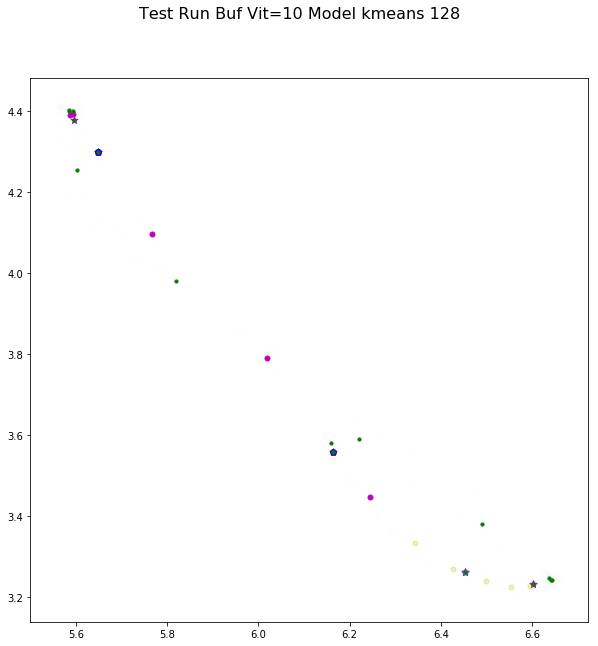

In [129]:
cc=ccxyth
paths= viterbi(obs_windowed,Modelo1,Modelo1.PI)  
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=10 Model kmeans 128', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)
ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='*',c='r',s=52 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='*',c='m',s=52 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='o',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=100,c='m')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=100,c='y',alpha=.25)
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



0.3


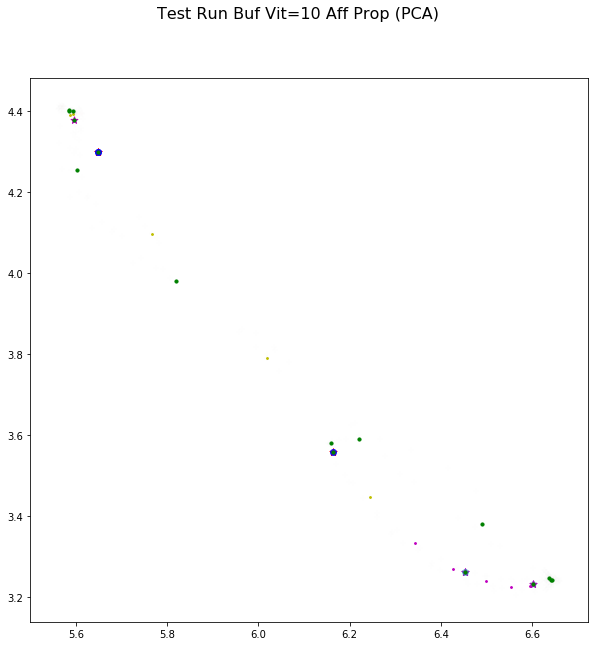

In [130]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=10 Aff Prop (PCA) ', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)
ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='*',c='r',s=52 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='*',c='m',s=52 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='o',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')

print(accuracy(ytrue,yhat2))

In [131]:
from sklearn.feature_selection import SelectKBest
lecs_kbest = pd.DataFrame(SelectKBest( k=15).fit_transform(lecs, data.Y))
lecs_kbest.shape

(264, 15)

In [132]:
path2

array([0., 5., 5., 3., 3., 3., 6., 6., 1., 1., 1.])

In [36]:
Modelo1.B.shape,Modelo2.B.shape

((16, 128), (16, 39))

In [37]:
np.max(obs2)

38

In [38]:
data

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,y_noise,x_noise,theta_noise,x_rot,y_rot,delta_odom,Y,Y_odom,Vk,Vk_aff
0,0.593,0.588,0.719,0.719,0.623,0.623,0.608,0.636,0.653,0.672,...,1.035714,1.350020,1.750313,6.641049,3.250945,0.000000,0,0,121,17
1,6.672,6.758,6.963,7.152,7.359,7.423,7.593,9.744,9.743,9.756,...,1.032806,1.344383,1.539686,6.636953,3.246101,0.004644,0,0,81,8
2,3.300,3.361,3.344,3.373,3.373,6.802,6.803,6.789,6.772,6.763,...,1.028448,1.340108,1.325055,6.634671,3.240439,0.016999,0,0,56,36
3,2.150,2.151,2.130,2.136,2.144,2.147,2.135,2.129,2.126,2.121,...,1.029537,1.338056,1.112569,6.632358,3.240660,0.016266,9,9,93,9
4,2.332,2.327,2.323,2.309,2.290,2.209,2.216,2.244,2.240,2.259,...,1.022495,1.335604,0.914470,6.632788,3.233215,0.019450,9,9,93,0
5,2.665,2.662,2.650,2.657,2.644,2.649,2.652,2.671,2.668,2.662,...,1.023280,1.333553,0.674101,6.630592,3.233155,0.029568,9,9,81,19
6,2.184,2.184,2.193,2.185,2.205,2.208,2.216,2.214,2.220,2.225,...,1.021649,1.329625,0.477713,6.627588,3.230146,0.033285,3,3,93,37
7,3.280,3.288,3.295,3.295,3.306,3.314,3.319,3.328,3.342,3.342,...,1.021730,1.326667,0.274111,6.624824,3.229088,0.037496,3,3,93,10
8,2.689,2.685,2.692,2.695,2.714,2.740,2.861,3.315,3.315,2.589,...,1.022636,1.325774,0.048981,6.623653,3.229584,0.037064,3,3,81,18
9,2.838,2.876,2.871,2.839,2.845,3.188,3.257,3.257,3.223,2.748,...,1.019186,1.332234,-0.153986,6.630941,3.228868,0.030765,11,11,93,1


In [39]:
Modelo2.B

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.26315789, 0.10526316,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26315789, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36842105, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.04761905,
        0.33333333, 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0. 

In [40]:
path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)

In [41]:
path2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
obs2_windowed

array([18,  1,  2, 11, 12,  3,  4,  5,  6, 38, 23,  7, 13, 20, 20, 21, 24,
       14, 25, 26, 27, 28, 29, 30, 31, 34, 15, 32, 16, 35])

In [43]:
obs_windowed

array([ 81,  93,  45,  81, 110,  54,   3, 109,  37, 114,  28,  56,  56,
        73, 102,   9,  11,  70,  88,  38,  85, 126,   7, 107,  33,   3,
         2,  93,  76,   7])

In [44]:
est_windowed

array([ 3, 11, 11, 11,  6,  6,  6,  1,  1,  1, 10, 10, 10,  5,  5,  5, 15,
       15,  4,  4, 14, 14, 14,  2,  2,  2,  7,  7,  7, 12])

In [45]:
Modelo2.B[:,18]

array([0.        , 0.        , 0.        , 0.28571429, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1       , 0.0625    , 0.        , 0.        ,
       0.        ])